## Forwardprogragation
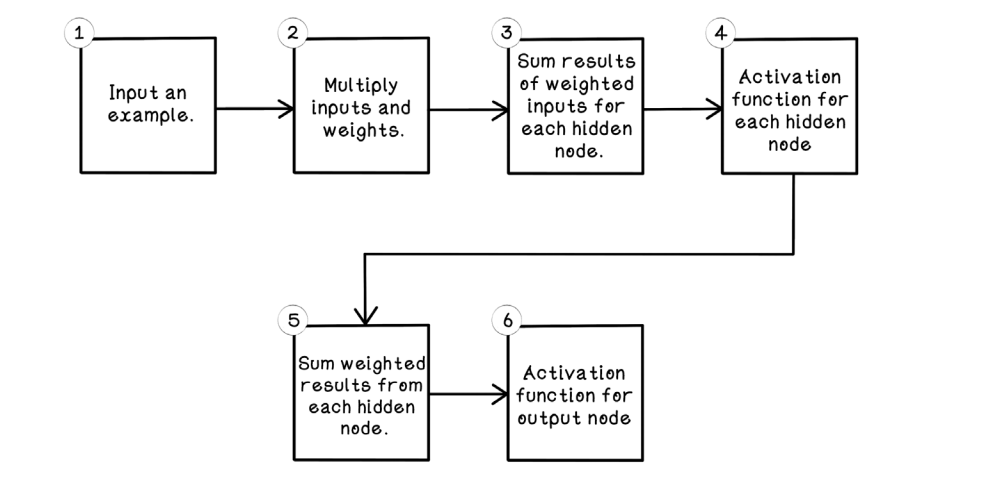

# Main

In [1]:
from NN.NeuronalesNetz import neuronalesNetz


if __name__ == '__main__':
    #Initialisiere ein neuronales Netzwerk
    nn=neuronalesNetz()

    #Erstelle Input-Neuronen
    i1=nn.createInputNeuron()
    i2=nn.createInputNeuron()

    """
    Erstelle versteckte Neuronen
    :param Neuronenanzahl pro Layer
    :param Anzahl der Layer 
    Default: Layer = 1
    """
    nn.createHiddenNeuron(2,2)
    #Erstellt ein Output-Neuron
    o1 = nn.createOutputNeuron()

    #Setze Werte für die Input-Neuronen
    i1.set_Value(2)
    i2.set_Value(3)

    #Erstelle eine vollständige Verbindung zwischen allen Neuronen
    nn.createFullMesh([1,1,1,1,1,1,1,1,1,1])

    #Druckt den Wert des Output-Neurons nach der Berechnung
    print(o1.get_Value())



20


## Methoden und Variablen

### Variablen der Klasse


<p>Repräsentiert eine Klasse, die ein neuronales Netzwerk darstellt.</p>

<p><strong>Attribute:</strong></p>
<ul>
    <li><code>inputNeuronen</code>: Eine Liste von Input-Neuronen.</li>
    <li><code>hiddenneuronen</code>: Eine Liste von Listen, die die versteckten Neuronen für jede Schicht enthält.</li>
    <li><code>outputneuronen</code>: Eine Liste von Output-Neuronen.</li>
    <li><code>gewichtzahl</code>: Die Gesamtanzahl der Gewichte im Netzwerk.</li>
</ul>


In [3]:
from NN.HiddenNeuron import hiddenneuron
from NN.InputNeuron import inputneuron
from NN.Connections import Connection
    
inputNeuronen: list[inputneuron] = []
hiddenneuronen: list[list[hiddenneuron]] = []
outputneuronen: list[hiddenneuron] = []
gewichtzahl: int

### createInputNeuron(self)->"inputneuron"


<p>Erstellt ein Input-Neuron und fügt es zur Liste der Input-Neuronen hinzu.</p>

<p><strong>Rückgabe:</strong></p>
<p>Das erstellte Input-Neuron.</p>


In [4]:
def createInputNeuron(self) -> "inputneuron":
        i1 = inputneuron()
        self.inputNeuronen.append(i1)
        return i1

### createOutputNeuron(self)->"hiddenneuron"


<p>Erstellt ein Output-Neuron und fügt es zur Liste der Output-Neuronen hinzu.</p>

<p><strong>Rückgabe:</strong></p>
<p>Das erstellte Output-Neuron.</p>



In [5]:
def createOutputNeuron(self) -> "hiddenneuron":
        o1 = hiddenneuron()
        self.outputneuronen.append(o1)
        return o1

### createHiddenNeuron(self,Neuronenanzahl:int, layer:int = 1)-> None


<p>Erstellt eine Schicht von versteckten Neuronen und fügt sie zur Liste der versteckten Neuronen hinzu.</p>

<p><strong>Parameter:</strong></p>
<ul>
    <li><code>Neuronenanzahl</code>: Die Anzahl der versteckten Neuronen in der Schicht.</li>
    <li><code>layer</code>: Die Schichtanzahl. Standardmäßig ist die Schichtanzahl gleich 1 (<code>layer=1</code>).</li>
</ul>



In [6]:
    def createHiddenNeuron(self, Neuronenanzahl: int, layer: int = 1) -> None:
        
        for i in range(layer):
            x: list[hiddenneuron] = []

            for n in range(Neuronenanzahl):
                h1 = hiddenneuron()
                x.append(h1)

            self.hiddenneuronen.append(x)
        return None

### calcGewichtAnzahl(self)->int

<p>Berechnet die Gesamtanzahl der Gewichte im neuronalen Netzwerk.</p>

<p><strong>Rückgabe:</strong></p>
<p>Die Gesamtanzahl der Gewichte im Netzwerk.</p>
<li>Berechung: Layer[0]*Layer[1]+Layer[1]*Layer[2] ... +Layer[n-1]*Layer[n]</li>

In [7]:
    def calcGewichtAnzahl(self) -> int:
        calcgewichte = 0
        gsize = [len(self.inputNeuronen)]

        for c in self.hiddenneuronen:
            gsize.append(len(c))
        gsize.append(len(self.outputneuronen))

        for i in range(len(gsize)):
            if i+1 == len(gsize):
                break
            calcgewichte += gsize[i]*gsize[i+1]

        self.gewichtzahl = calcgewichte
        return self.gewichtzahl

### createFullMesh(self, gewichte: list[float]) -> None

<p>Erstellt ein vollständiges Netzwerk mit den gegebenen Gewichten.</p>

<p><strong>Parameter:</strong></p>
<ul>
    <li><code>gewichte</code>: Eine Liste von Gewichten für alle Verbindungen im Netzwerk.</li>
</ul>

In [8]:
    def createFullMesh(self, gewichte: list[float]) -> None:

        if len(self.inputNeuronen) == 0 or len(self.hiddenneuronen) == 0 or len(self.outputneuronen) == 0:
            raise NotImplemented("Das Netzwerk ist nicht vollständig initialisiert.")

        if self.calcGewichtAnzahl() != len(gewichte):
            raise NotImplemented("Die Anzahl der Gewichte stimmt nicht mit der erwarteten Anzahl überein.")


        index = 0
        for o1 in self.outputneuronen:
            for hlast in self.hiddenneuronen[len(self.hiddenneuronen)-1]:
                o1.addConnection(Connection(hlast, gewichte[index]))
                index += 1

        if len(self.hiddenneuronen)>1:
            index = self.verkettungHiddens(gewichte, index, len(self.hiddenneuronen)-1, len(self.hiddenneuronen)-2)

        for h1 in self.hiddenneuronen[0]:
            for i1 in self.inputNeuronen:
                h1.addConnection(Connection(i1, gewichte[index]))
                index += 1


#### verkettungsHiddens(self, gewichte: list[float], index: int, index1: int, index: int) -> int

<p>Verkettet die versteckten Neuronen in den Schichten.</p>

<p><strong>Parameter:</strong></p>
<ul>
    <li><code>gewichte</code>: Eine Liste von Gewichten für alle Verbindungen im Netzwerk.</li>
    <li><code>index</code>: Der aktuelle Index in der Liste der Gewichte.</li>
    <li><code>index1</code>: Der Index der ersten Schicht von Neuronen.</li>
    <li><code>index2</code>: Der Index der zweiten Schicht von Neuronen.</li>
</ul>

<p><strong>Rückgabe:</strong></p>
<p>Der aktualisierte Index in der Liste der Gewichte.</p>

In [9]:
    def verkettungHiddens(self, gewichte: list[float], index: int, index1: int, index2: int) -> int:
        if index1 == 0:
            return index

        for h2 in self.hiddenneuronen[index1]:
            for h1 in self.hiddenneuronen[index2]:
                h2.addConnection(Connection(h1, gewichte[index]))
                index += 1

        return self.verkettungHiddens(gewichte, index, index1-1, index2-1)

## kompletter SourceCode

In [10]:
from NN.HiddenNeuron import hiddenneuron
from NN.InputNeuron import inputneuron
from NN.Connections import Connection


class neuronalesNetz:
    """
        Eine Klasse, die ein neuronales Netzwerk repräsentiert.

        :ivar inputNeuronen: Eine Liste von Input-Neuronen.
        :ivar hiddenneuronen: Eine Liste von Listen, die die versteckten Neuronen für jede Schicht enthält.
        :ivar outputneuronen: Eine Liste von Output-Neuronen.
        :ivar gewichtzahl: Die Gesamtanzahl der Gewichte im Netzwerk.
    """
    inputNeuronen: list[inputneuron] = []
    hiddenneuronen: list[list[hiddenneuron]] = []
    outputneuronen: list[hiddenneuron] = []
    gewichtzahl: int

    def __init__(self):
        """
            Initialisiert ein neuronales Netzwerk.
        """
        pass

    def createInputNeuron(self) -> "inputneuron":
        """
            Erstellt ein Input-Neuron und fügt es zur Liste der Input-Neuronen hinzu.

            :return: Das erstellte Input-Neuron.
        """
        i1 = inputneuron()
        self.inputNeuronen.append(i1)
        return i1

    def createOutputNeuron(self) -> "hiddenneuron":
        """
            Erstellt ein Output-Neuron und fügt es zur Liste der Output-Neuronen hinzu.

            :return: Das erstellte Output-Neuron.
        """
        o1 = hiddenneuron()
        self.outputneuronen.append(o1)
        return o1

    def createHiddenNeuron(self, Neuronenanzahl: int, layer: int = 1) -> None:
        """
            Erstellt eine Schicht von versteckten Neuronen und fügt sie zur Liste der versteckten Neuronen hinzu.

            :param Neuronenanzahl: Die Anzahl der versteckten Neuronen in der Schicht.
            :param layer: Die Schichtnummer. Standardmäßig ist es die erste Schicht (layer=1).
        """
        for i in range(layer):
            x: list[hiddenneuron] = []

            for n in range(Neuronenanzahl):
                h1 = hiddenneuron()
                x.append(h1)

            self.hiddenneuronen.append(x)
        return None

    def calcGewichtAnzahl(self) -> int:
        """
            Berechnet die Gesamtanzahl der Gewichte im neuronalen Netzwerk.

            :return: Die Gesamtanzahl der Gewichte im Netzwerk.
        """
        calcgewichte = 0
        gsize = [len(self.inputNeuronen)]

        for c in self.hiddenneuronen:
            gsize.append(len(c))
        gsize.append(len(self.outputneuronen))

        for i in range(len(gsize)):
            if i+1 == len(gsize):
                break
            calcgewichte += gsize[i]*gsize[i+1]

        self.gewichtzahl = calcgewichte
        return self.gewichtzahl

    def createFullMesh(self, gewichte: list[float]) -> None:
        """
            Erstellt ein vollständiges Netzwerk mit den gegebenen Gewichten.

            :param gewichte: Eine Liste von Gewichten für alle Verbindungen im Netzwerk.
        """

        if len(self.inputNeuronen) == 0 or len(self.hiddenneuronen) == 0 or len(self.outputneuronen) == 0:
            raise NotImplemented("Das Netzwerk ist nicht vollständig initialisiert.")

        if self.calcGewichtAnzahl() != len(gewichte):
            raise NotImplemented("Die Anzahl der Gewichte stimmt nicht mit der erwarteten Anzahl überein.")


        index = 0
        for o1 in self.outputneuronen:
            for hlast in self.hiddenneuronen[len(self.hiddenneuronen)-1]:
                o1.addConnection(Connection(hlast, gewichte[index]))
                index += 1

        if len(self.hiddenneuronen)>1:
            index = self.verkettungHiddens(gewichte, index, len(self.hiddenneuronen)-1, len(self.hiddenneuronen)-2)

        for h1 in self.hiddenneuronen[0]:
            for i1 in self.inputNeuronen:
                h1.addConnection(Connection(i1, gewichte[index]))
                index += 1

    def verkettungHiddens(self, gewichte: list[float], index: int, index1: int, index2: int) -> int:
        """
            Verkettet die versteckten Neuronen in den Schichten.

            :param gewichte: Eine Liste von Gewichten für alle Verbindungen im Netzwerk.
            :param index: Der aktuelle Index in der Liste der Gewichte.
            :param index1: Der Index der ersten Schicht von Neuronen.
            :param index2: Der Index der zweiten Schicht von Neuronen.
            :return: Der aktualisierte Index in der Liste der Gewichte.
        """
        if index1 == 0:
            return index

        for h2 in self.hiddenneuronen[index1]:
            for h1 in self.hiddenneuronen[index2]:
                h2.addConnection(Connection(h1, gewichte[index]))
                index += 1

        return self.verkettungHiddens(gewichte, index, index1-1, index2-1)


# Klassen / Bauteile

## Aktivierungsfunktionen

In [15]:
import numpy as np

### sigmoid(value) -> float

Berechnet die Sigmoid-Aktivierungsfunktion für einen gegebenen Wert.

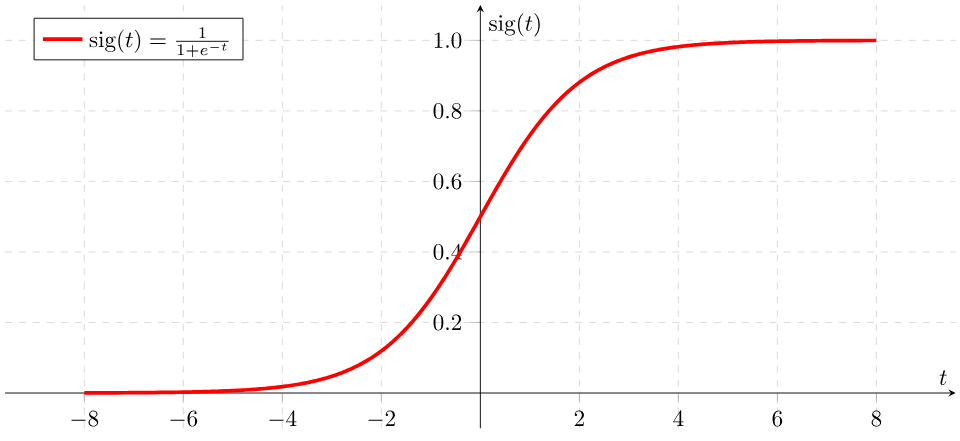


**Parameter:**
- `value`: Der Eingabewert für die Sigmoid-Funktion.

**Rückgabe:**
Der berechnete Sigmoid-Wert.

In [16]:
def sigmoid(value) -> float:
    sig = 1 / (1 + np.exp(-value))
    return sig


### ReLu(value) -> float



Berechnet die Rectified Linear Unit (ReLU)-Aktivierungsfunktion für einen gegebenen Wert.
<figure>
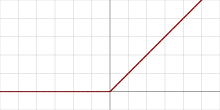
    <figcaption>https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_rectified_linear.svg/220px-Activation_rectified_linear.svg.png</figcaption>
</figure>

**Parameter:**
- `value`: Der Eingabewert für die ReLU-Funktion.

**Rückgabe:**
Der berechnete ReLU-Wert.

In [18]:
def ReLu(value) -> float:
    return value if value > 0 else 0

### Tanh(value) -> float

Berechnet die Tangens hyperbolicus (Tanh)-Aktivierungsfunktion für einen gegebenen Wert.
<figure>
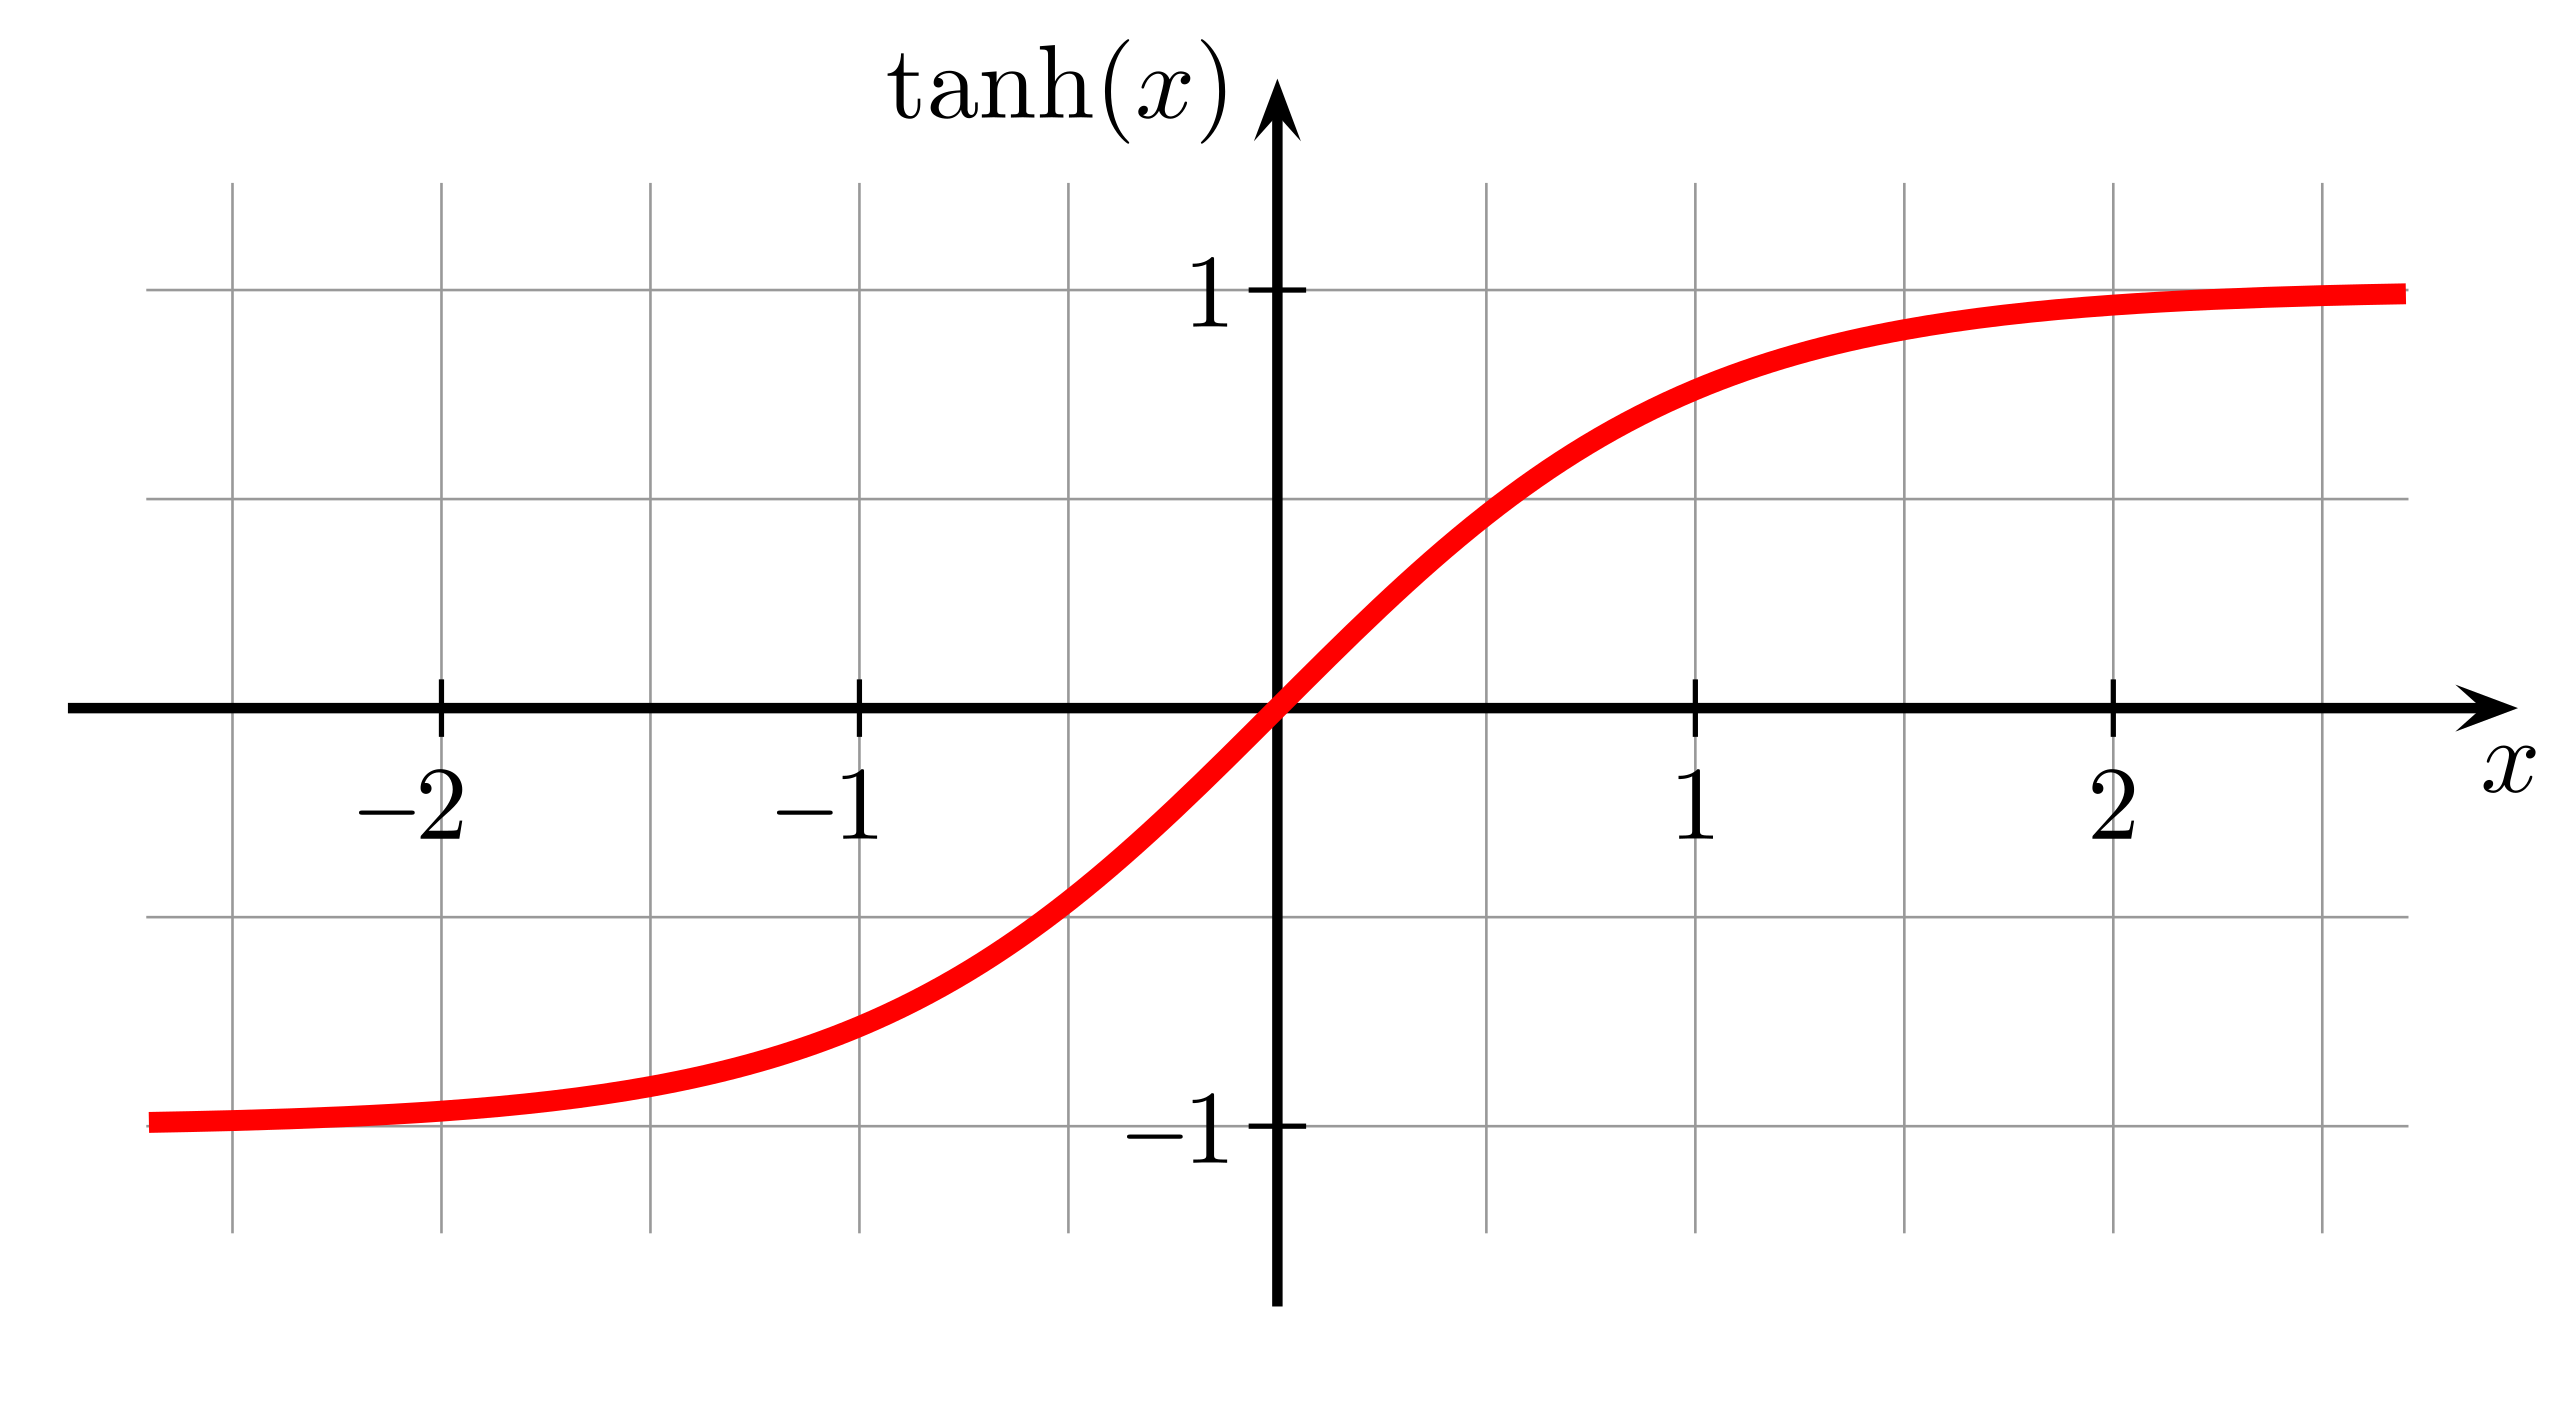
    <figcaption>https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Hyperbolic_Tangent.svg/2560px-Hyperbolic_Tangent.svg.png</figcaption>
</figure>


**Parameter:**
- `value`: Der Eingabewert für die Tanh-Funktion.

**Rückgabe:**
Der berechnete Tanh-Wert.

In [19]:
def Tanh(value) -> float:
    tanh = 1 - (2 / (1 + np.exp(2 * value)))
    return tanh

## Neuronen

<p>Eine abstrakte Basisklasse für Neuronen in einem neuronalen Netzwerk.</p>

<p>Alle Unterklassen müssen die Methode <code>get_Value</code> implementieren.</p>

<p><strong>Methode:</strong></p>
<p><code>get_Value</code>: Eine abstrakte Methode, die den Wert des Neurons zurückgeben soll.</p>

In [11]:
class neuron:
    
    def get_Value(self) -> float:
        pass

### InputNeuron

In [12]:
from NN.Neuron import neuron


class inputneuron(neuron):
    """
        Klasse für ein Input-Neuron in einem neuronalen Netzwerk.

        Vererbung: Die Klasse erbt von der allgemeinen Neuron-Klasse.

        :ivar value: Der aktuelle Wert des Input-Neurons.
    """
    def __init__(self):
        """
            Initialisiert ein Input-Neuron mit einem Wert von 0.
        """
        self.value = 0

    def get_Value(self) -> float:
        """
            Gibt den aktuellen Wert des Input-Neurons zurück.

            :return: Der aktuelle Wert des Input-Neurons.
        """
        return self.value

    def set_Value(self, value) -> None:
        """
            Setzt den Wert des Input-Neurons auf den angegebenen Wert.
            :param value: Der Wert, auf den das Input-Neuron gesetzt werden soll.
        """
        self.value = value
        return None


### HiddenNeuron

In [13]:
from NN.Neuron import neuron
from NN.Connections import Connection
from NN.Aktivierung import *


class hiddenneuron(neuron):
    """
        Klasse für ein verstecktes Neuron in einem neuronalen Netzwerk.

        Vererbung: Die Klasse erbt von der allgemeinen Neuron-Klasse.

        :ivar Connections: Eine Liste von Verbindungen zu anderen Neuronen.
        :ivar value: Der aktuelle Wert des Neurons nach der Aktivierungsfunktion.
    """

    def __init__(self):
        """
            Initialisiert ein verstecktes Neuron mit einer leeren Liste von Verbindungen und einem Wert von 0.
        """
        self.Connections: list[Connection] = []
        self.value: float = 0

    def get_Value(self) -> float:
        """
            Berechnet den Wert des Neurons nach der Aktivierungsfunktion (hier ReLU).

            :return: Der aktuelle Wert des Neurons.
        """
        value_sum = 0
        for c in self.Connections:
            value_sum += c.getValue()

        self.value = ReLu(value_sum)
        return self.value

    def addConnection(self, c: Connection) -> None:
        """
            Fügt eine Verbindung zu anderen Neuronen hinzu.

            :param c: Die hinzuzufügende Verbindung.
        """
        self.Connections.append(c)
        return None


## Connections

<p>Eine Verbindung zwischen zwei Neuronen mit einem bestimmten Gewicht.</p>

<h3>__init__(self,neuron1: "neuron", gewicht: float)</h3>
<p>Initialisiert eine Verbindung mit einem Neuron und einem Gewicht.</p>

<p><strong>Parameter:</strong></p>
    
<ul>
        <li><code>neuron1</code>: Das verknüpfte Neuron.</li>
        <li><code>gewicht</code>: Das Gewicht der Verbindung.</li>
    </ul>

<h3> getValue(self)->float</h3>
<p>Berechnet den Wert der Verbindung, indem der Wert des verknüpften Neurons mit dem Gewicht multipliziert wird.</p>
  <p><strong>Rückgabe:</strong></p   <p>Der berechnete Wert der Verbindung.</p>

In [14]:
from NN.Neuron import neuron


class Connection:

    def __init__(self, neuron1: "neuron", gewicht: float):
        self.gewicht = gewicht
        self.neuron = neuron1

    def getValue(self) -> float:
        return self.neuron.get_Value() * self.gewicht
